In [1]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import IPython
import IPython.display

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import concat
from pandas import DataFrame

import datetime,os

In [2]:
# File name and Path
cwd = os.getcwd()
path_adress = "/Import_Dataset/"

# ข้อมูล พิกัดสถานที่เเละรายชื้ออ้างอิงสถานที่ตรวจวัด
file_name_st = 'Data_lat_long_Rice research Center'
csv_file_st = cwd + path_adress + file_name_st + '.csv'

df_st = pd.read_csv(csv_file_st)
print("All low RiceCenter {} station" .format(df_st.shape[0]))

data_list_st_num = list(range(0, len(df_st)))
data_list_st_name = []
data_list_st_name = df_st['nameEng'].values.tolist()
data_list_st_lat = df_st['Latitude'].values.tolist()
data_list_st_long = df_st['Longitude'].values.tolist()

#################-- Moving Averag data --#################
def mavr_dataset(frames_sma,rolling_num,our_rate,mode):    
    h_name = list(frames_sma)
    if mode == 'sum':
        frames_sma['mirid bug'] = frames_sma['mirid bug'].rolling(rolling_num, min_periods=1).sum().round(1)
        frames_sma['bph'] = frames_sma['bph'].rolling(rolling_num, min_periods=1).sum().round(1)
        frames_sma['precip'] = frames_sma['precip'].rolling(rolling_num, min_periods=1).sum().round(1)
    else:
        frames_sma['mirid bug'] = frames_sma['mirid bug'].rolling(rolling_num, min_periods=1).mean().round(1)
        frames_sma['bph'] = frames_sma['bph'].rolling(rolling_num, min_periods=1).mean().round(1)
        frames_sma['precip'] = frames_sma['precip'].rolling(rolling_num, min_periods=1).mean().round(1)
   
    for i in range(7,12):
        frames_sma[h_name[i]] = frames_sma[h_name[i]].rolling(rolling_num, min_periods=1).mean().round(1)

    constant_subset = frames_sma[::our_rate] 
    return constant_subset

#################-- creat_dataset  --#################
def creat_dataset(st_BPH = 'ALL', y_1='2015', y_2='2019', m_avr='ALL'):
    for i in range(len(data_list_st_num)):
        st = i
        file_name = df_st['nameEng'][data_list_st_num[st]]
        name_input = file_name
        name_locals = 'stN_' + file_name

        # File name and Path
        csv_file = cwd + path_adress + name_input + '.csv'
        # index_col=0 , index_col=None
        dataset = pd.read_csv(csv_file, header=0,
                              index_col=0, encoding="TIS-620")

        if m_avr == '3-DAY-All-':
            locals()[name_locals] = mavr_dataset(dataset,3,1,'mean')
        elif m_avr == '7-DAY-All':
            locals()[name_locals] = mavr_dataset(dataset,7,1,'mean')
        elif m_avr == '14-DAY-All':
            locals()[name_locals] = mavr_dataset(dataset,14,1,'mean')
        elif m_avr == '3-DAY-Sampling':
            locals()[name_locals] = mavr_dataset(dataset,3,3,'sum')
        elif m_avr == '7-DAY-Sampling':
            locals()[name_locals] = mavr_dataset(dataset,7,7,'sum')
        elif m_avr == '14-DAY-Sampling':
            locals()[name_locals] = mavr_dataset(dataset,14,14,'sum')
        else :
            locals()[name_locals] = dataset
            # print(f'Dataframe name_station: {st+1 , name_input}')
        print('wait......')
        del dataset
        clear_output(wait=True)

    date_start = y_1 + '-01' + '-01'
    date_stop = y_2 + '-12' + '-31'

#---------------------------------------------------------------------------------------------------------------------------------------------------#
    if st_BPH != 'ALL' :
        # file_name = df_st['nameEng'][data_list_st_num[st_BPH]]
        file_name = st_BPH
        locals_input = 'stN_' + file_name
        print(locals_input)
        dataset_st = locals()[locals_input].loc[date_start:date_stop]
        frames_st = dataset_st
    else:
        m = 0
        for j in range(len(data_list_st_num)):
            # for j in range(df_st.shape[0]):
            # file_name = df_st['nameEng'][j]
            file_name = df_st['nameEng'][data_list_st_num[j]]
            locals_input = 'stN_' + file_name
            print(locals_input)
            dataset_st = locals()[locals_input].loc[date_start:date_stop]
            clear_output(wait=True)
            if m == 0:
                frames_st = dataset_st
                m = m+1
                print(m)
            else:
                frames_st = [frames_st, dataset_st]
                frames_st = pd.concat(frames_st)

    # dataset    
    frames = frames_st
    return frames
#---------------------------------------------------------------------------------------------------------------------------------------------------#

#################-- Drop Colum  --#################
def drop_col(df_drop,drop = ['address']):
    for j in range(len(drop)):
        df_drop = df_drop.drop(drop[j], axis=1)
    return df_drop

#################--      Plot        --#################
def plot_data(frames_train,plot_cols,df_name,start='2015',end='2017',st = 'ALL'):
    #ตรวจสอบข้อมูล dataset 
    if st == 'ALL':
        df_plot = frames_train[plot_cols]
    else:
        df_plot = frames_train[plot_cols].loc[start:end]
    
    plt.figure()    
    # df_plot.plot(lw=1,grid=True,figsize=(13,30),subplots=True)
    # df_plot.plot(lw=1,grid=True,subplots=True)
    # df_plot.plot(marker='.',grid=True,linestyle = 'solid',subplots=True)
    df_plot.plot(marker='.',grid=True,linestyle = 'solid')
    plt.xlabel('Date time-'+ df_name)
    plt.legend()
    # plt.show()   

#################--   get list of folders in directory   --#################
dir_path = cwd + "/Export_lstm/model/"
def get_list_folder():
    folder_list = os.listdir(dir_path)
    return folder_list

def get_file_model(file_name):
    txt = dir_path+file_name+"/Training_model_data_discription.txt"
    string_data = open(txt,"r").read()
    list_txt = list(string_data.split("\n"))
    return list_txt
    

All low RiceCenter 34 station


In [3]:
#########################################-- Dashboard Input Data--#########################################
ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#################-- DataFrame station --#################
output_df_st = widgets.Output()
def dropdown_station_eventhandler(change):
    output_df_st.clear_output()
    with output_df_st:  
        if (change.new == ALL):
            display(df_st)
        else:
            display(df_st[df_st.nameEng == change.new])

#################-- DataFrame station --#################
output_df_st_predict = widgets.Output()
def dropdown_station_predict_eventhandler(change):
    output_df_st_predict.clear_output()
    with output_df_st_predict:  
        if (change.new == ALL):
            display(df_st)
        else:
            display(df_st[df_st.nameEng == change.new])

#################-- load data  --#################


output_df_train = widgets.Output()
output_df_val = widgets.Output()
output_df_test = widgets.Output()
output_df_col = widgets.Output()
def clicked_load(b):
    global df_out_train
    global df_out_val
    global df_out_test
    global selected_data 
    output_df_train.clear_output()
    output_df_val.clear_output()
    output_df_test.clear_output()
    output_df_col.clear_output()
    with output_df_train:
        df_out_train = creat_dataset(dropdown_name_st.value,dropdown_year_train1.value,dropdown_year_train2.value,dropdown_sampling_data.value)
        display(df_out_train)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_train1.value,dropdown_year_train2.value,dropdown_sampling_data.value))
    with output_df_val:
        df_out_val = creat_dataset(dropdown_name_st.value,dropdown_year_val1.value,dropdown_year_val2.value,dropdown_sampling_data.value)
        display(df_out_val)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_val1.value,dropdown_year_val2.value,dropdown_sampling_data.value))
    with output_df_test:
        df_out_test = creat_dataset(dropdown_name_st.value,dropdown_year_test1.value,dropdown_year_test2.value,dropdown_sampling_data.value)
        display(df_out_test)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_test1.value,dropdown_year_test2.value,dropdown_sampling_data.value))
    with output_df_col:
        checkbox_objects = []
        # global selected_data
        data = sorted(set(chek_list(df_out_train)),reverse=True)     
        names = []
        for key in data:
                checkbox_objects.append(widgets.Checkbox(value=True, description=key))
                names.append(key)
 
        arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}
        ui = widgets.HBox(children=checkbox_objects)
        display(ui)
             
        selected_data = []
        def select_data(**kwargs):
            selected_data.clear()
            for key in kwargs:
                if kwargs[key] is True:
                    selected_data.append(key)
            print(selected_data)

        widgets.interactive_output(select_data, arg_dict)
    
 
#################-- Export data  --#################
df_train = widgets.Output()
df_val = widgets.Output()
df_test = widgets.Output()
def clicked_export(b):
    df_train.clear_output()
    df_val.clear_output()
    df_test.clear_output()
    global frames_train
    global frames_val
    global frames_test
    with df_train:
        frames_train = drop_col(df_out_train,selected_data) 
        display(frames_train)
    with df_val:
        frames_val = drop_col(df_out_val,selected_data) 
        display(frames_val)  
    with df_test:
        frames_test = drop_col(df_out_test,selected_data) 
        display(frames_test)  

def chek_list(df_ch):
        data_col = set(df_ch.columns)
        return data_col      

#################----------------------------- DashBoard display ----------------------------------#################
dropdown_name_st = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_st.nameEng),description='station :')
dropdown_sampling_data = widgets.Dropdown(options = ['All','3-DAY-All','7-DAY-All','14-DAY-All','3-DAY-Sampling','7-DAY-Sampling','14-DAY-Sampling'],valure = 'All-DAY',description='Sampling :')
dropdown_year_train1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],description='Year-train :')
dropdown_year_train2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2017')
dropdown_year_val1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2018',description='Year-val :')
dropdown_year_val2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2018')
dropdown_year_test1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2019',description='Year-test :')
dropdown_year_test2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2019')


button_download = widgets.Button(description='load data',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_export = widgets.Button(description='export dataset',disabled=False,button_style='success',tooltip='Click me',icon='check')

button_download.on_click(clicked_load)
button_export.on_click(clicked_export)

dropdown_name_st.observe(dropdown_station_eventhandler, names='value')


item_layout = widgets.Layout(margin='0 0 15px 0')
input_widgets_row1 = widgets.HBox([dropdown_name_st,dropdown_year_train1,dropdown_year_train2,dropdown_year_val1,dropdown_year_val2,dropdown_year_test1,dropdown_year_test2],layout = item_layout)
input_widgets_row2 = widgets.HBox([dropdown_sampling_data,button_download,button_export],layout = item_layout)

tab_dataset = widgets.Tab([output_df_st,output_df_train,output_df_val,output_df_test,output_df_col,df_train,df_val,df_test])
tab_dataset.set_title(0, 'Dataset station')
tab_dataset.set_title(1, 'train-data')
tab_dataset.set_title(2, 'validation-data')
tab_dataset.set_title(3, 'test-data')
tab_dataset.set_title(4, 'Drop-data')
tab_dataset.set_title(5, 'Dataset-train')
tab_dataset.set_title(6, 'Dataset-validation')
tab_dataset.set_title(7, 'Dataset-test')
dashboard_dataset = widgets.VBox([input_widgets_row1,input_widgets_row2])
display(dashboard_dataset)
display(tab_dataset)


In [4]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [6]:
dataset = frames_train['bph'].values.tolist()
# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequence(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(1091, 5) (1091,)
[1.  0.5 0.7 0.8 0.6] 0.7
[0.5 0.7 0.8 0.6 0.7] 5.4
[0.7 0.8 0.6 0.7 5.4] 5.3
[0.8 0.6 0.7 5.4 5.3] 5.3
[0.6 0.7 5.4 5.3 5.3] 5.3
[0.7 5.4 5.3 5.3 5.3] 5.1
[5.4 5.3 5.3 5.3 5.1] 5.1
[5.3 5.3 5.3 5.1 5.1] 5.0
[5.3 5.3 5.1 5.1 5. ] 0.3
[5.3 5.1 5.1 5.  0.3] 0.3
[5.1 5.1 5.  0.3 0.3] 0.3
[5.1 5.  0.3 0.3 0.3] 0.1
[5.  0.3 0.3 0.3 0.1] 0.3
[0.3 0.3 0.3 0.1 0.3] 0.3
[0.3 0.3 0.1 0.3 0.3] 0.3
[0.3 0.1 0.3 0.3 0.3] 0.1
[0.1 0.3 0.3 0.3 0.1] 0.1
[0.3 0.3 0.3 0.1 0.1] 0.1
[0.3 0.3 0.1 0.1 0.1] 0.3
[0.3 0.1 0.1 0.1 0.3] 0.1
[0.1 0.1 0.1 0.3 0.1] 0.1
[0.1 0.1 0.3 0.1 0.1] 0.1
[0.1 0.3 0.1 0.1 0.1] 0.3
[0.3 0.1 0.1 0.1 0.3] 0.3
[0.1 0.1 0.1 0.3 0.3] 0.4
[0.1 0.1 0.3 0.3 0.4] 0.3
[0.1 0.3 0.3 0.4 0.3] 0.3
[0.3 0.3 0.4 0.3 0.3] 0.3
[0.3 0.4 0.3 0.3 0.3] 0.3
[0.4 0.3 0.3 0.3 0.3] 0.3
[0.3 0.3 0.3 0.3 0.3] 0.3
[0.3 0.3 0.3 0.3 0.3] 0.1
[0.3 0.3 0.3 0.3 0.1] 0.1
[0.3 0.3 0.3 0.1 0.1] 0.3
[0.3 0.3 0.1 0.1 0.3] 0.3
[0.3 0.1 0.1 0.3 0.3] 0.3
[0.1 0.1 0.3 0.3 0.3] 0.3
[0.1 0.3 0.3 0.3 0.3

In [12]:
# the dataset knows the number of features, e.g. 2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = models.Sequential()
model.add(layers.Conv1D(filters = 64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs= 1000, verbose=1)

Epoch 1/1000
35/35 [==============================] - 0s 675us/step - loss: 72497.7826
Epoch 2/1000
35/35 [==============================] - 0s 889us/step - loss: 26095.1936
Epoch 3/1000
35/35 [==============================] - 0s 737us/step - loss: 18614.8811
Epoch 4/1000
35/35 [==============================] - 0s 675us/step - loss: 13813.0557
Epoch 5/1000
35/35 [==============================] - 0s 660us/step - loss: 10941.9820
Epoch 6/1000
35/35 [==============================] - 0s 570us/step - loss: 12459.5726
Epoch 7/1000
35/35 [==============================] - 0s 647us/step - loss: 10772.3020
Epoch 8/1000
35/35 [==============================] - 0s 783us/step - loss: 5039.1872
Epoch 9/1000
35/35 [==============================] - 0s 630us/step - loss: 7001.5955
Epoch 10/1000
35/35 [==============================] - 0s 676us/step - loss: 10427.9687
Epoch 11/1000
35/35 [==============================] - 0s 721us/step - loss: 5948.4773
Epoch 12/1000
35/35 [=======================

In [9]:
dataset_predict = frames_val['bph'].values.tolist()
# convert into input/output
X_p, y_p = split_sequence(dataset_predict, n_steps)
print(X_p.shape, y_p.shape)
# summarize the data
for i in range(len(X_p)):
	print(X_p[i], y_p[i])

(360, 5) (360,)
[1.7 1.6 1.6 0.7 1.6] 4.0
[1.6 1.6 0.7 1.6 4. ] 5.7
[1.6 0.7 1.6 4.  5.7] 7.9
[0.7 1.6 4.  5.7 7.9] 8.0
[1.6 4.  5.7 7.9 8. ] 7.9
[4.  5.7 7.9 8.  7.9] 7.7
[5.7 7.9 8.  7.9 7.7] 6.9
[7.9 8.  7.9 7.7 6.9] 4.4
[8.  7.9 7.7 6.9 4.4] 3.4
[7.9 7.7 6.9 4.4 3.4] 1.4
[7.7 6.9 4.4 3.4 1.4] 2.6
[6.9 4.4 3.4 1.4 2.6] 4.0
[4.4 3.4 1.4 2.6 4. ] 4.4
[3.4 1.4 2.6 4.  4.4] 5.0
[1.4 2.6 4.  4.4 5. ] 7.0
[2.6 4.  4.4 5.  7. ] 10.1
[ 4.   4.4  5.   7.  10.1] 12.0
[ 4.4  5.   7.  10.1 12. ] 11.1
[ 5.   7.  10.1 12.  11.1] 10.3
[ 7.  10.1 12.  11.1 10.3] 10.6
[10.1 12.  11.1 10.3 10.6] 10.4
[12.  11.1 10.3 10.6 10.4] 12.0
[11.1 10.3 10.6 10.4 12. ] 8.6
[10.3 10.6 10.4 12.   8.6] 6.7
[10.6 10.4 12.   8.6  6.7] 6.4
[10.4 12.   8.6  6.7  6.4] 5.9
[12.   8.6  6.7  6.4  5.9] 5.1
[8.6 6.7 6.4 5.9 5.1] 4.7
[6.7 6.4 5.9 5.1 4.7] 1.0
[6.4 5.9 5.1 4.7 1. ] 0.4
[5.9 5.1 4.7 1.  0.4] 0.4
[5.1 4.7 1.  0.4 0.4] 0.3
[4.7 1.  0.4 0.4 0.3] 2.4
[1.  0.4 0.4 0.3 2.4] 12.9
[ 0.4  0.4  0.3  2.4 12.9] 16.4
[ 0.4

In [13]:
# demonstrate prediction
x_input = X_p[:][:]
x_input = x_input.reshape((x_input.shape[0], n_steps, n_features))
# x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
# print(yhat)

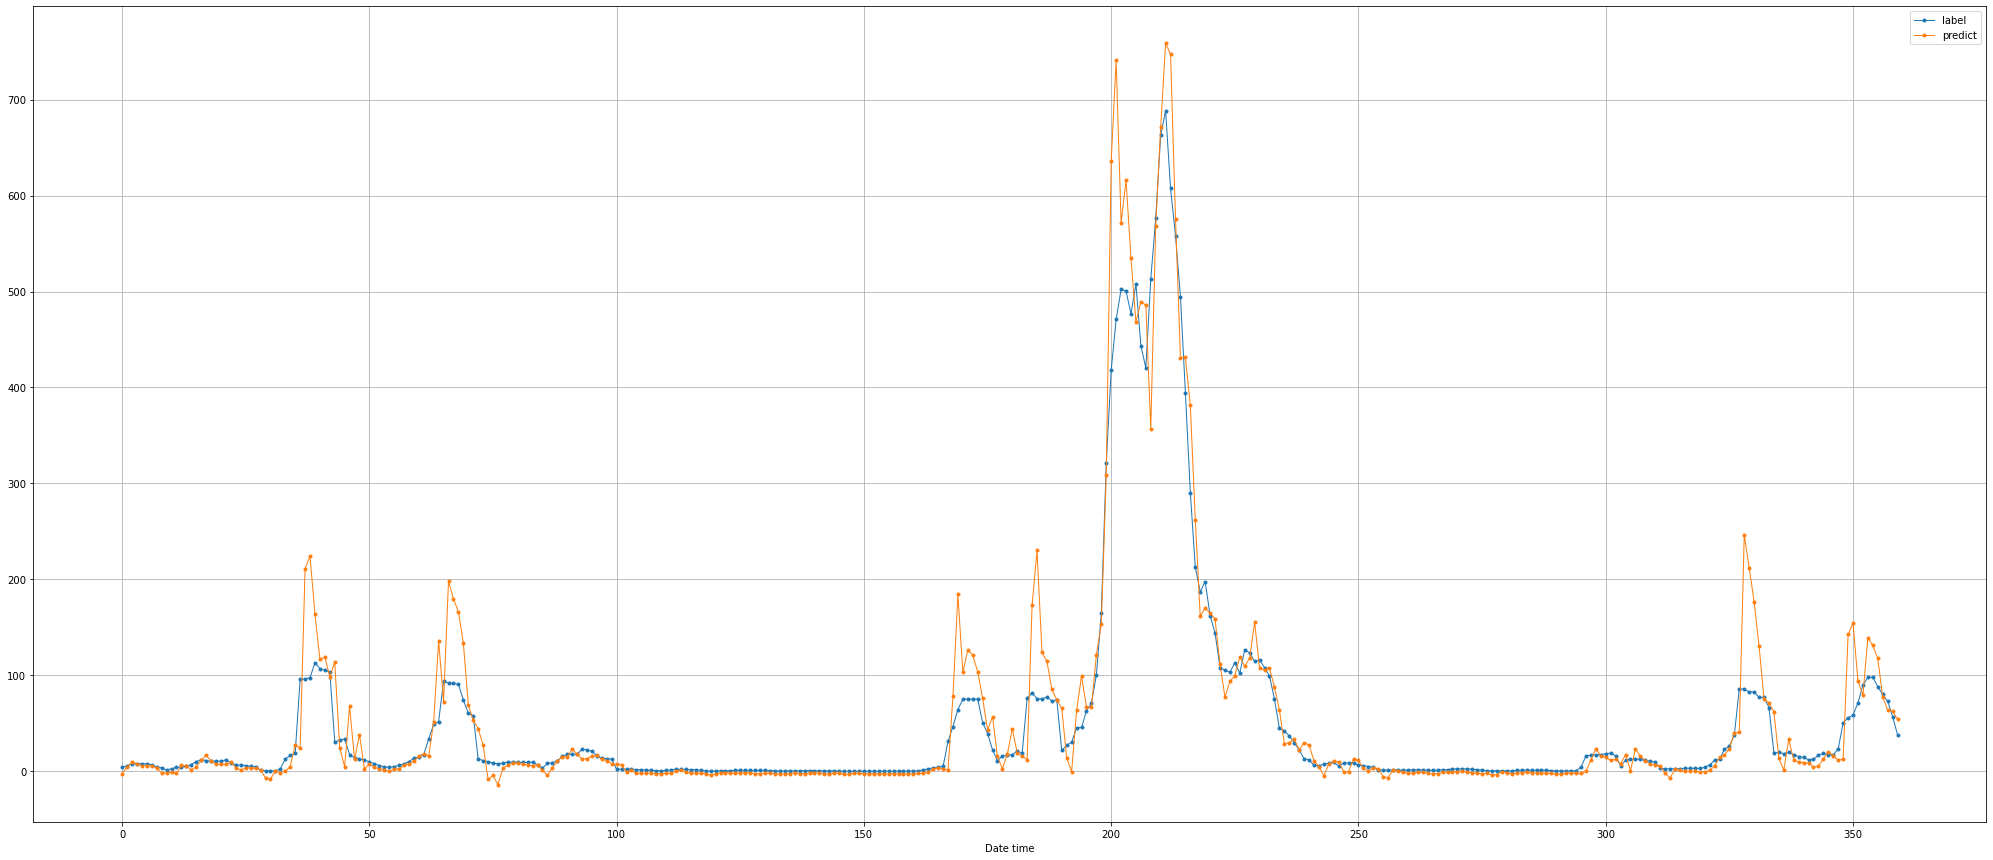

In [15]:
df_bph = pd.DataFrame(list(y_p),columns=['label'])
df_bph['predict'] = pd.DataFrame(list(yhat))
# df_1['Column_B']=df_2

df_bph.plot(lw=1,grid=True,figsize=(35,15),subplots=False,marker='.')
plt.xlabel('Date time')
plt.legend()
plt.show()